# 02. Neural Network classification with PyTorch

Classification is a problem whether something is one thing or another(there can be multiple things as the options)

Resource - https://www.learnpytorch.io/02_pytorch_classification/

## 1. Make classification data and get it ready

In [ ]:
import sklearn


In [ ]:
from sklearn.datasets import make_circles

In [ ]:
# Make 1000 samples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples, noise=0.03, random_state=42)


In [ ]:
len(X), len(y) # features & labels respectively

(1000, 1000)

In [ ]:
print(f"Frist 5 samples of x:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

Frist 5 samples of x:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
# Make Dataframe of circles data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2":X[:, 1],
                        "label": y})

circles.head(5)

X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0

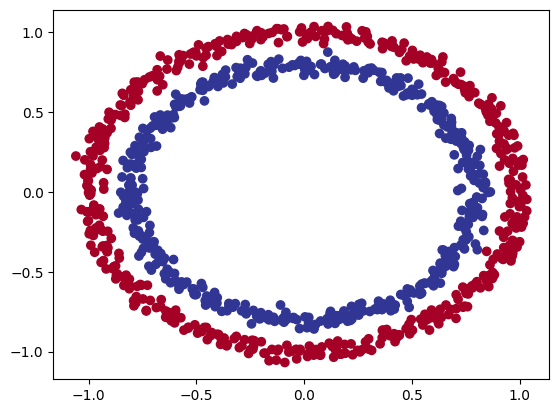

In [ ]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note: The above data is often referred to as toy dataset, a dataset that is small enough to experiment but still sizeable to practice the fundamentals.

### 1.1 Check input & output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first sample of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of y: {y_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of y: () and the same for y: ()


## 1.2 Turn data into Tensors and create train and test splits

In [ ]:
import torch


In [ ]:
type(X)

numpy.ndarray

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)



In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [ ]:
torch.manual_seed(42)

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)  # the order is always features 1st and labels next and 20% of data will be test set and 80% will be the train set

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

## 2. Building a model

let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so that the code will run on GPU if there is one
2. Construct a model by subclassing ```nn.module```
3. Define a loss function and optimizer
4. Create a train and test loop


In [ ]:
# Import PyTorch & nn
import torch
from torch import nn

# Make device specific code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we have setup device agnostic code, let us create a model:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create two `nn.linear()` layers that are capable of handling the shape of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computations)
4. Instatiate an instance of our model class and send it to the target device

In [ ]:
# 1. Construct a model that sub classes nn.module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 linear layers capable of handeling the shape of our data
        self.layer_1 = nn.Linear(in_features=2,    # takes in 2 features and upscale to 5 features
                                 out_features=5)   # usually takes in multiples of 8

        self.layer_2 = nn.Linear(in_features=5,
                                 out_features=1)   # takes in 5 features from previous layer and outputs a single layer (same shape as y)

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(x))  # x -> layer_1 -> layer_2 -> output

# 4. Instantitate an instance of our model class and send it to target device
model_0 = CircleModelV0().to(device)
model_0

# can be replicated as
# class CircleModelV0(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.two_linear_layers = nn.Sequential(
#             nn.Linear(in_features=2, out_features=5),
#             nn.Linear(in_features=5, out_features=1)
#         )

#     # 3. Define a forward() method that outlines the forward pass
#     def forward(self, x: torch.Tensor) -> torch.Tensor:
#         return self.two_linear_layers(x)


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Replicate the model using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

This is problem specific..

1. For regression you might use MAE or MSE (mean absolute error or mean squared error).

2. For classification you might use binary cross entropy or categorical cross entropy (cross entropy).

Again... the loss function measures how wrong your model's prediction are

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For the loss function we are going to use `torch.nn.BECWithLogitsLoss()`, for more on what binary cross entropy (BCE) is, follow the link - (https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)


In [ ]:
# Setup the loss function
#loss_fn = nn.BCELoss() # BCELoss requires inputs to have gone through the sigmoid acivation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

# Optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy - out of 100 examples, what % does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc


## 3. Train Model

To train our model, we are going to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (back propagation)
5. Optimizer step (gradient descent)

### 3.1  Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.(i,e the output of **model_0**)

We can convert these **logits** into prediction probabilities by passing them to some kinf of activation function (e.g sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.
* Round for sigmoid
* `argmax()` for softmax

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logits to turn into prediction probabilities
y_pred_probs =torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our prediction probabilty values, we need to perform a range-style rounding om them:

* `y_pred_probs` >= 0.5,`y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [ ]:
# Find the predicited labels
y_preds = torch.round(y_pred_probs)

# In full (logits > pred_probs > pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and eval/test loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # turn logits > pred pobs > pred labels

    # 2. Calculate  loss/accuracy
    loss = loss_fn(y_logits,       # nn.BCEWithLogitsLoss excepts raw logits as input
                   y_train)

    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (back propagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate loss/accuracy
        test_loss = loss_fn(test_logits,
                       y_test)

        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what is happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")






Epoch: 0 | Loss: 0.69796, Acc: 51.88% | Test loss: 0.69440, Test acc: 58.00%
Epoch: 100 | Loss: 0.69331, Acc: 49.25% | Test loss: 0.69271, Test acc: 53.00%
Epoch: 200 | Loss: 0.69310, Acc: 50.88% | Test loss: 0.69336, Test acc: 49.00%
Epoch: 300 | Loss: 0.69304, Acc: 51.12% | Test loss: 0.69376, Test acc: 46.50%
Epoch: 400 | Loss: 0.69301, Acc: 51.25% | Test loss: 0.69403, Test acc: 47.50%
Epoch: 500 | Loss: 0.69299, Acc: 50.88% | Test loss: 0.69423, Test acc: 47.00%
Epoch: 600 | Loss: 0.69299, Acc: 51.25% | Test loss: 0.69436, Test acc: 46.50%
Epoch: 700 | Loss: 0.69298, Acc: 51.25% | Test loss: 0.69446, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.50% | Test loss: 0.69453, Test acc: 45.50%
Epoch: 900 | Loss: 0.69298, Acc: 51.38% | Test loss: 0.69458, Test acc: 45.00%


## 4. Make predictions and evaluate the model

From the metrics the model isn't learning anything..

So to inspect it lets's make some predictions and make them visual!

To do so, import a function `plot_decision_boundary()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_function.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py", "wb") as f:
        f.write(request.content)

from helper_function import plot_predictions, plot_decision_boundary

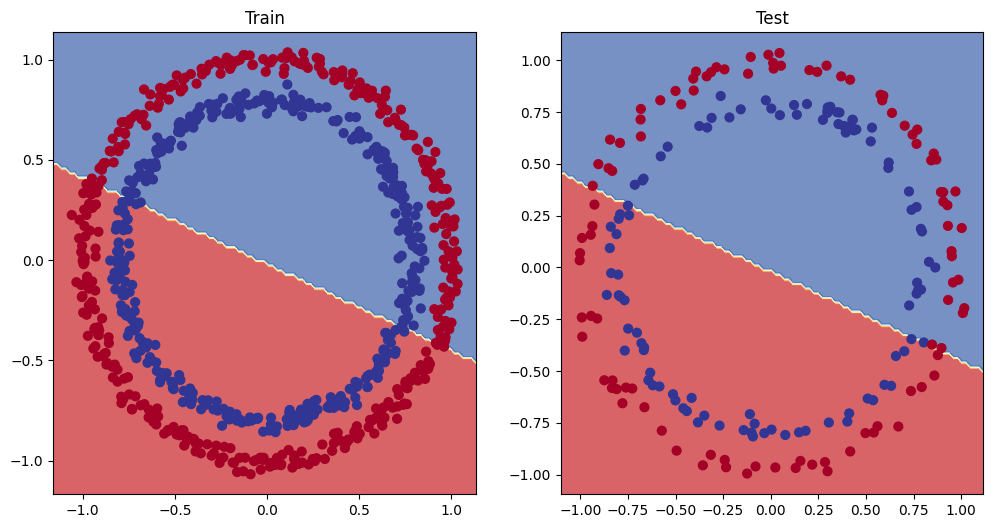

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model's perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units a 10 hidden units
* Fit for longer (more epochs)
* Changing the activation functions
* Change the learning rate
* Change the loss function

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number- of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000
* **Note**: experiment changing 1 at a time


In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # z = self.layer_1(x)            # 'z' typical notation for logits
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                         lr=0.01)

In [ ]:
# Write a trainig and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
    ### Training
    model_1.train()

    # Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # logits > pred probabilities > pred labels

    # Calculate loss/accuracy
    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # Optimizer zero grad
    optimizer.zero_grad()

    # loss backward (back propagation)
    loss.backward()

    # Optimizer step (gradient descent)
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

        # Optimizer zero grad
        optimizer.zero_grad()

    # Print
    if epoch % 100 == 0:
        print(f"Epochs: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")



Epochs: 0 | Loss: 0.69396, Acc: 50.88% | Test loss: 0.69261, Test Acc: 51.00%
Epochs: 100 | Loss: 0.69369, Acc: 50.25% | Test loss: 0.69269, Test Acc: 50.00%
Epochs: 200 | Loss: 0.69351, Acc: 50.12% | Test loss: 0.69282, Test Acc: 49.50%
Epochs: 300 | Loss: 0.69339, Acc: 50.50% | Test loss: 0.69295, Test Acc: 49.00%
Epochs: 400 | Loss: 0.69329, Acc: 50.38% | Test loss: 0.69309, Test Acc: 48.50%
Epochs: 500 | Loss: 0.69322, Acc: 49.88% | Test loss: 0.69322, Test Acc: 49.50%
Epochs: 600 | Loss: 0.69317, Acc: 49.50% | Test loss: 0.69335, Test Acc: 53.00%
Epochs: 700 | Loss: 0.69313, Acc: 49.38% | Test loss: 0.69347, Test Acc: 50.50%
Epochs: 800 | Loss: 0.69309, Acc: 50.00% | Test loss: 0.69358, Test Acc: 51.00%
Epochs: 900 | Loss: 0.69307, Acc: 50.62% | Test loss: 0.69368, Test Acc: 47.50%


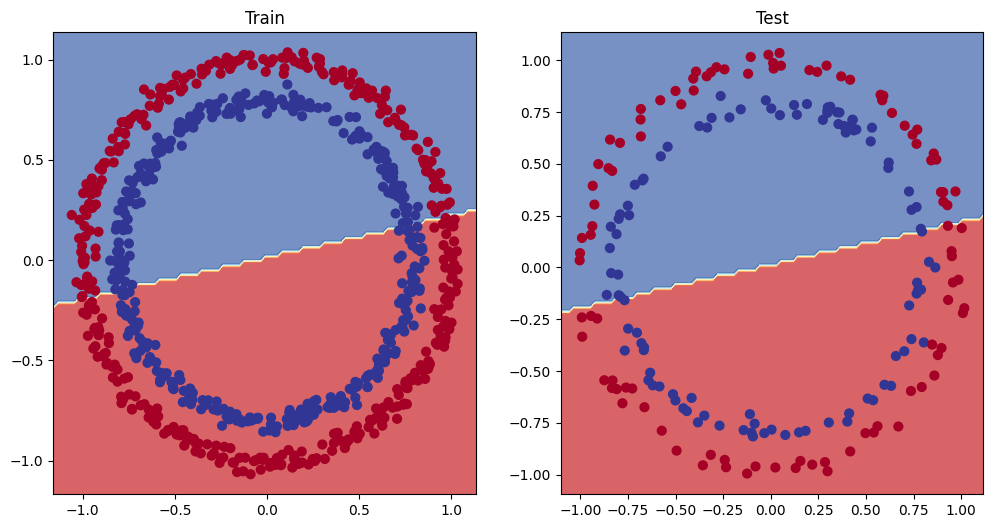

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot a larger is to test a smaller problem

In [ ]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

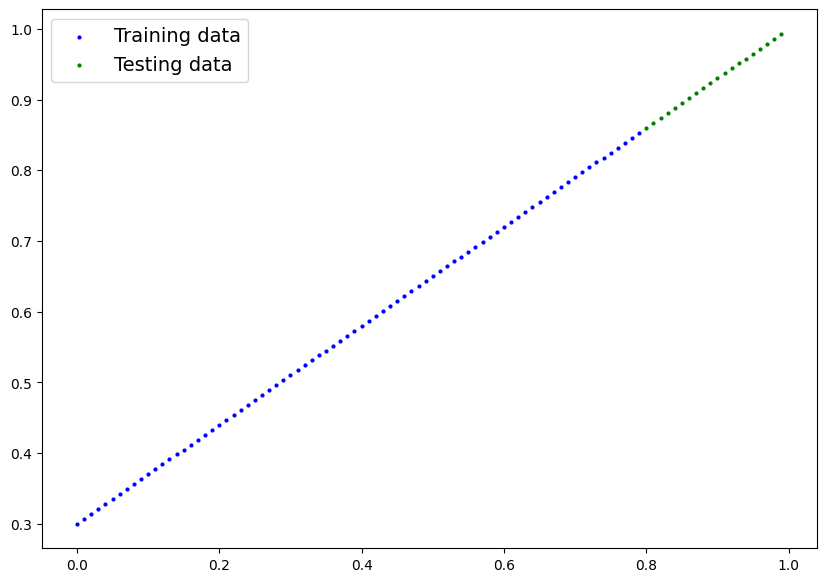

In [ ]:
# import from helper functions

plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=None)

### 5.2 Adjusting `model_1` to fit a straight line

In [ ]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and an optimizer

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
# Train model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ## Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


TypeError: ignored

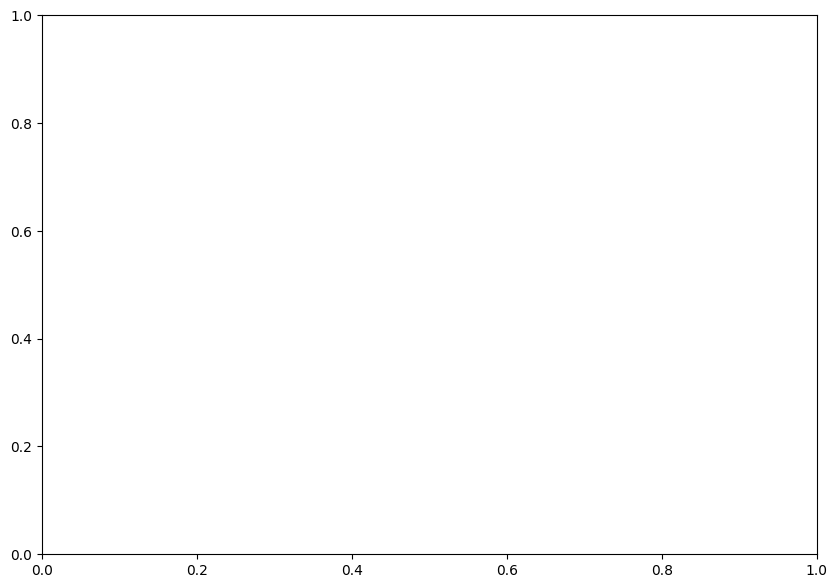

In [ ]:
# Evaluate model
model_2.eval()

# make predictions (inference)
with torch.inference_mode():
    y_pred = model_2(X_test_regression)

# Plot data
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_pred.cpu())

## 6. The missing piece: non-linearity



### 6.1 Recreating non linear data (red & blue circles)

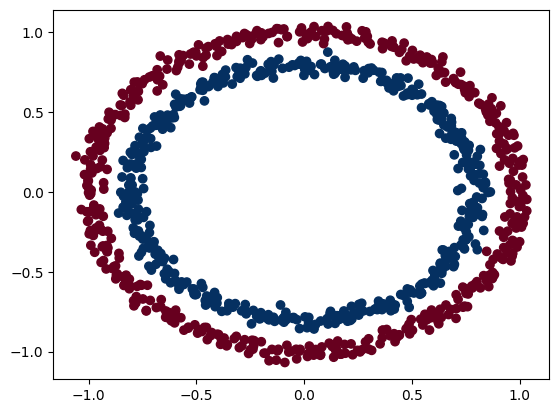

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdBu)

In [ ]:
# Convert data to tensors and then to train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train,X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)
X_train[:5], y_train[:5], X_test[:5], y_test[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]),
 tensor([1., 0., 1., 0., 1.]))

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)


(800, 800, 200, 200)

### 6.2 Building a model with non-linearity

In [ ]:
# Buils a model with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()  # relu is a non-linear function

    def forward(self, x):
        # Where should we put non-linear activation function?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizers

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr = 0.1)


### 6.3 Training a model with non-linearity

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
    ### Training
    model_3.train()

    # forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))  # logits -> prediction probabilities -> predictions labels

    # Calculate the loss
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits and first input)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Claculate loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print
    if epoch % 100 == 0:
        print(f"Epochs: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}%, | Test_loss: {test_loss:.5f}, Test_Acc: {test_acc:.2f}%")


Epochs: 0 | Loss: 0.69295, Acc: 50.00%, | Test_loss: 0.69319, Test_Acc: 50.00%
Epochs: 100 | Loss: 0.69115, Acc: 52.88%, | Test_loss: 0.69102, Test_Acc: 52.50%
Epochs: 200 | Loss: 0.68977, Acc: 53.37%, | Test_loss: 0.68940, Test_Acc: 55.00%
Epochs: 300 | Loss: 0.68795, Acc: 53.00%, | Test_loss: 0.68723, Test_Acc: 56.00%
Epochs: 400 | Loss: 0.68517, Acc: 52.75%, | Test_loss: 0.68411, Test_Acc: 56.50%
Epochs: 500 | Loss: 0.68102, Acc: 52.75%, | Test_loss: 0.67941, Test_Acc: 56.50%
Epochs: 600 | Loss: 0.67515, Acc: 54.50%, | Test_loss: 0.67285, Test_Acc: 56.00%
Epochs: 700 | Loss: 0.66659, Acc: 58.38%, | Test_loss: 0.66322, Test_Acc: 59.00%
Epochs: 800 | Loss: 0.65160, Acc: 64.00%, | Test_loss: 0.64757, Test_Acc: 67.50%
Epochs: 900 | Loss: 0.62362, Acc: 74.00%, | Test_loss: 0.62145, Test_Acc: 79.00%


## 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:5], y_test[:5]

(tensor([1., 0., 1., 0., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.], device='cuda:0'))

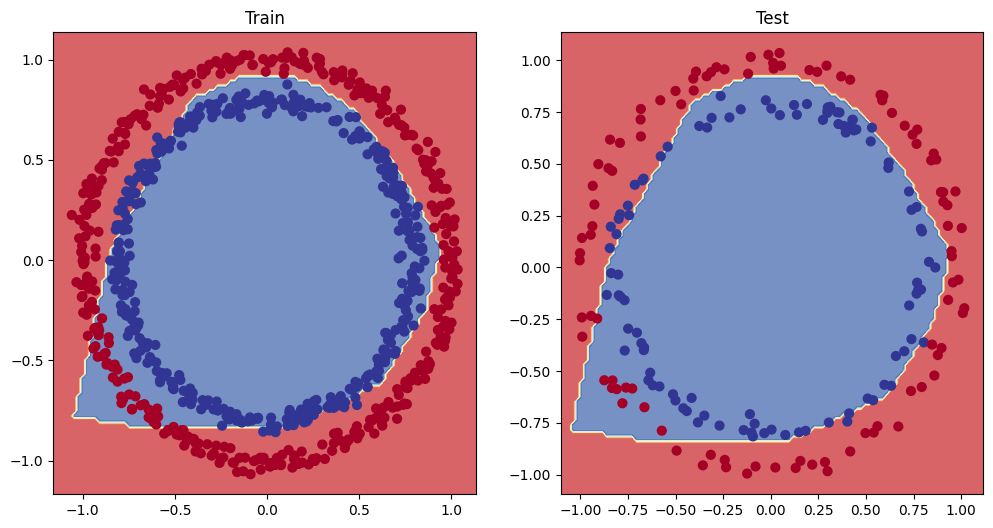

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### Improving the model

In [ ]:
class CircleModelV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=64)
        self.layer_2 = nn.Linear(in_features=64, out_features=64)
        self.layer_3 = nn.Linear(in_features=64, out_features=64)
        self.layer_4 = nn.Linear(in_features=64, out_features=64)
        self.layer_5 = nn.Linear(in_features=64, out_features=1)
        self.relu = nn.ReLU()

    def forward(self,x):
        return self.layer_5(self.relu(self.layer_4(self.relu(self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))))))

model_4 = CircleModelV3().to(device)
model_4

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=64, bias=True)
  (layer_4): Linear(in_features=64, out_features=64, bias=True)
  (layer_5): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    model_4.train()
    y_logits = model_4(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits,
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epochs: {epoch} | loss: {loss:.5f}, acc: {acc:.2f}% | Test loss: {test_loss:.5f}, acc: {acc:.2f}%")

Epochs: 0 | loss: 0.69561, acc: 50.00% | Test loss: 0.69511, acc: 50.00%
Epochs: 100 | loss: 0.69174, acc: 62.25% | Test loss: 0.69234, acc: 62.25%
Epochs: 200 | loss: 0.68931, acc: 63.50% | Test loss: 0.69083, acc: 63.50%
Epochs: 300 | loss: 0.68442, acc: 61.00% | Test loss: 0.68765, acc: 61.00%
Epochs: 400 | loss: 0.66872, acc: 73.88% | Test loss: 0.67565, acc: 73.88%
Epochs: 500 | loss: 0.56306, acc: 96.38% | Test loss: 0.58324, acc: 96.38%
Epochs: 600 | loss: 0.50600, acc: 60.25% | Test loss: 0.53083, acc: 60.25%
Epochs: 700 | loss: 0.36754, acc: 77.00% | Test loss: 0.45075, acc: 77.00%
Epochs: 800 | loss: 0.02746, acc: 100.00% | Test loss: 0.04738, acc: 100.00%
Epochs: 900 | loss: 0.01034, acc: 100.00% | Test loss: 0.02233, acc: 100.00%


In [ ]:
# Predictions
model_4.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_4(X_test))).squeeze()

y_test[:5], y_preds[:5]

(tensor([1., 0., 1., 0., 1.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.], device='cuda:0'))

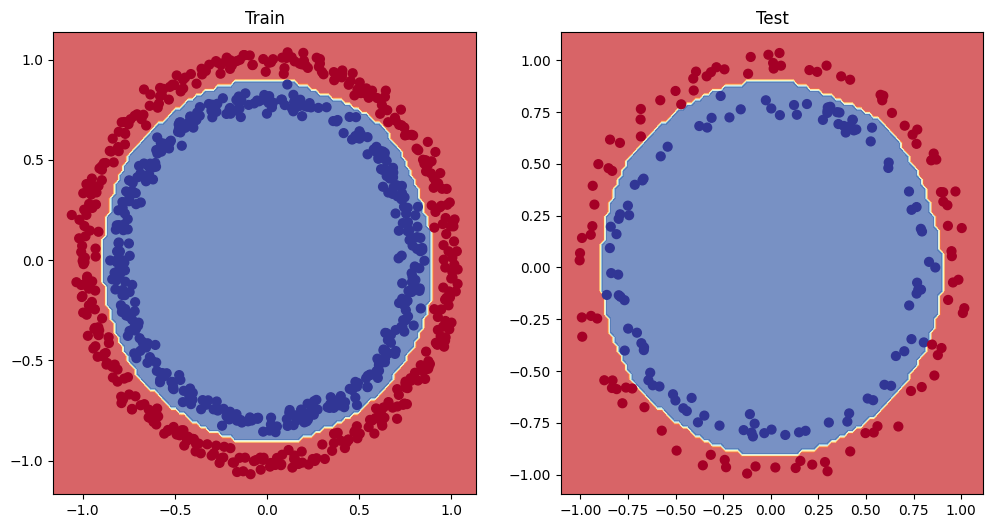

In [ ]:
# Plot
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)

## 7. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

### 7.1 Creating a toy multi-class dataset

In [ ]:
from sklearn.datasets import make_blobs

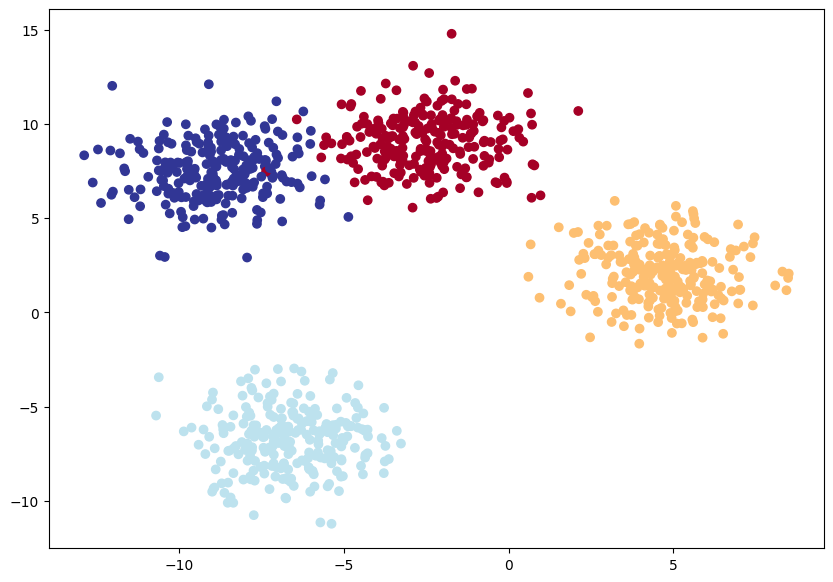

In [ ]:
# Set the hyperparameters for data creations
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class datau
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test sets
X_blob_train, X_blob_test,y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                       y_blob,
                                                                       test_size=0.2,
                                                                       random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### 7.2 Building a multi-class classification model in PyTorch

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi_class calssification model

        Args:
            input_features (int): Number of input features to the model
            output_features (int): Number of output features (number of output_classes)
            hidden_units (int): Numbetr of hidden units between layers, default 8
        """

        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_5 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_5


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

### 7.3 Create a loss function and an optimizer for a multi-class classification model

In [ ]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_5.parameters(),
                            lr=0.1)


### 7.4 Getting predicition probabilities for multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred_probs (use `torch.softmax()`) -> Pred_labels (take the argmax of the prediction probabilities)

In [ ]:
# Raw outputs of the model (which is logits)
model_5.eval()
with torch.inference_mode():
    y_logits = model_5(X_blob_test.to(device))

y_logits[:5] #  these are logits

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')

In [ ]:
# Convert logits output to pred probs
y_pred_probs = torch.softmax(y_logits, dim=1)
y_logits[:5], y_pred_probs[:5]

(tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
         [-0.0973, -0.9431, -0.5963, -0.1371],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [-0.4134, -0.5204, -0.9303, -0.6963],
         [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0'),
 tensor([[0.3169, 0.3244, 0.1405, 0.2182],
         [0.3336, 0.1432, 0.2026, 0.3206],
         [0.3011, 0.1843, 0.2823, 0.2323],
         [0.3078, 0.2766, 0.1836, 0.2320],
         [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0'))

In [ ]:
# Convert our model's prediction probabilities tp prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10], y_blob_test[:10]

(tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

### 7.5 Create a training and testing loop for a multi-class PyTorch Model

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data to the target device
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

# Set number of epochs
epochs = 1000

# Train model
for epoch in range(epochs):
    ### Training
    model_5.train()

    # Forward pass
    y_logits = model_5(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits,
                   y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Testing
    model_5.eval()
    with torch.inference_mode():
        test_logits = model_5(X_blob_test)
        test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits,
                       y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test,
                               y_pred=test_pred)

    # Print
    if epoch % 100 ==0:
        print(f"Epochs: {epoch} | loss: {loss:.5f}, acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {acc:.2f}%")


Epochs: 0 | loss: 1.15883, acc: 40.38% | Test loss: 1.07554, Test acc: 40.38%
Epochs: 100 | loss: 0.03312, acc: 99.25% | Test loss: 0.02433, Test acc: 99.25%
Epochs: 200 | loss: 0.02657, acc: 99.25% | Test loss: 0.01651, Test acc: 99.25%
Epochs: 300 | loss: 0.02503, acc: 99.25% | Test loss: 0.01440, Test acc: 99.25%
Epochs: 400 | loss: 0.02427, acc: 99.25% | Test loss: 0.01335, Test acc: 99.25%
Epochs: 500 | loss: 0.02377, acc: 99.25% | Test loss: 0.01269, Test acc: 99.25%
Epochs: 600 | loss: 0.02339, acc: 99.25% | Test loss: 0.01218, Test acc: 99.25%
Epochs: 700 | loss: 0.02307, acc: 99.25% | Test loss: 0.01179, Test acc: 99.25%
Epochs: 800 | loss: 0.02279, acc: 99.25% | Test loss: 0.01147, Test acc: 99.25%
Epochs: 900 | loss: 0.02253, acc: 99.25% | Test loss: 0.01120, Test acc: 99.25%


### 7.6 Making and evaluating predictions with a PyTorch multi-class model

In [ ]:
# Make predictions
model_5.eval()
with torch.inference_mode():
    y_logits = model_5(X_blob_test)

y_logits[:5]

tensor([[ -2.3751,  10.9387, -10.2038, -11.3271],
        [ -2.1934,  -9.4839,  -6.3062,   5.2289],
        [ -4.9855,  -5.3790,   5.3840,  -4.3115],
        [ -3.0428,   8.1532,  -5.4971,  -6.6867],
        [  6.4903,  -2.8976, -12.3324,  -8.4675]], device='cuda:0')

In [ ]:
# Go from logits > Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:5]

tensor([[1.6516e-06, 1.0000e+00, 6.5756e-10, 2.1386e-10],
        [5.9742e-04, 4.0743e-07, 9.7751e-06, 9.9939e-01],
        [3.1372e-05, 2.1166e-05, 9.9989e-01, 6.1553e-05],
        [1.3729e-05, 9.9998e-01, 1.1797e-06, 3.5901e-07],
        [9.9992e-01, 8.3727e-05, 6.6890e-09, 3.1907e-07]], device='cuda:0')

In [ ]:
# Go fro pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

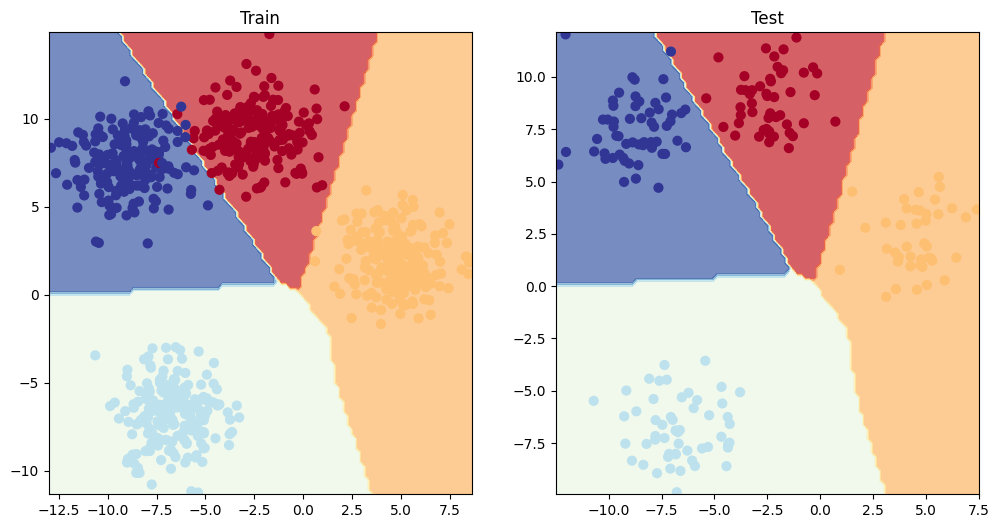

In [ ]:
# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, X_blob_test, y_blob_test)